In [1]:
# A notebook for simple lstm exploration
# Case of single lstm cell
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import lstm, lstm_pool
from peratouch.config import datapath_three_users

input_size = 4 
D = Data(datapath_three_users, triggers=True, releases=False)
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=True)
D.tensors_to_device()
D.print_shapes()
model = lstm(input_size=input_size, hidden_size=16, out_size=3) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=200, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

Train, test and validation data normalized to:
[1.]
[1.0011533]
[1.00011294]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (7497, 1, 32) 
Labels shape:  (7497,) 
Unique labels:  [0 1 2] 
Shape of test set: (1125, 29, 4) 
Shape of train set: (5416, 29, 4) 
Shape of validation set: (956, 29, 4) 
Fraction of single class in test set:  0.31377777777777777 
dtype of inputs:  torch.float32
End of epoch 1:loss_tr=1.075, loss_val=1.075, train=34.5%, val=32.2%
End of epoch 2:loss_tr=0.935, loss_val=0.927, train=50.4%, val=52.6%
End of epoch 3:loss_tr=0.933, loss_val=0.928, train=52.2%, val=53.0%
End of epoch 4:loss_tr=0.892, loss_val=0.884, train=53.0%, val=54.1%
End of epoch 5:loss_tr=0.881, loss_val=0.874, train=54.5%, val=53.8%
End of epoch 6:loss_tr=0.862, loss_val=0.863, train=54.0%, val=54.3%
End of epoch 7:loss_tr=0.863, loss_val=0.868, train=52.5%, val=53.9%
End of epoch 8:loss_tr=0.858, loss_val=0.857, train=55.3%, val=55.1%
End of epoch 9:loss_tr=0.845, loss_val=0.844, 

KeyboardInterrupt: 

Train, test and validation data normalized to:
[1.]
[1.0011533]
[1.00011294]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (7497, 1, 32) 
Labels shape:  (7497,) 
Unique labels:  [0 1 2] 
Shape of test set: (1125, 25, 8) 
Shape of train set: (5416, 25, 8) 
Shape of validation set: (956, 25, 8) 
Fraction of single class in test set:  0.31377777777777777 
dtype of inputs:  torch.float32
End of epoch 1:loss_tr=1.069, loss_val=1.069, train=41.7%, val=40.6%
End of epoch 2:loss_tr=1.120, loss_val=1.114, train=36.0%, val=35.1%
End of epoch 3:loss_tr=1.092, loss_val=1.096, train=31.6%, val=29.3%
End of epoch 4:loss_tr=1.088, loss_val=1.095, train=37.1%, val=36.0%
End of epoch 5:loss_tr=1.037, loss_val=1.040, train=55.6%, val=53.3%
End of epoch 6:loss_tr=0.967, loss_val=0.963, train=53.1%, val=53.3%
End of epoch 7:loss_tr=1.008, loss_val=0.999, train=46.1%, val=48.5%
End of epoch 8:loss_tr=0.940, loss_val=0.941, train=52.6%, val=52.4%
End of epoch 9:loss_tr=0.915, loss_val=0.915, 

End of epoch 113:loss_tr=0.474, loss_val=0.448, train=80.4%, val=82.5%
End of epoch 114:loss_tr=0.474, loss_val=0.450, train=79.9%, val=82.1%
End of epoch 115:loss_tr=0.549, loss_val=0.512, train=75.2%, val=77.3%
End of epoch 116:loss_tr=0.489, loss_val=0.464, train=78.5%, val=81.0%
End of epoch 117:loss_tr=0.498, loss_val=0.481, train=77.5%, val=77.9%
End of epoch 118:loss_tr=0.462, loss_val=0.433, train=80.5%, val=83.1%
End of epoch 119:loss_tr=0.542, loss_val=0.530, train=74.4%, val=74.7%
End of epoch 120:loss_tr=0.608, loss_val=0.552, train=73.2%, val=74.7%
End of epoch 121:loss_tr=0.474, loss_val=0.452, train=79.4%, val=80.3%
End of epoch 122:loss_tr=0.477, loss_val=0.452, train=79.5%, val=81.6%
End of epoch 123:loss_tr=0.468, loss_val=0.435, train=79.9%, val=82.9%
End of epoch 124:loss_tr=0.620, loss_val=0.604, train=70.5%, val=70.4%
End of epoch 125:loss_tr=0.480, loss_val=0.451, train=79.9%, val=80.6%
End of epoch 126:loss_tr=0.532, loss_val=0.503, train=76.1%, val=78.3%
End of

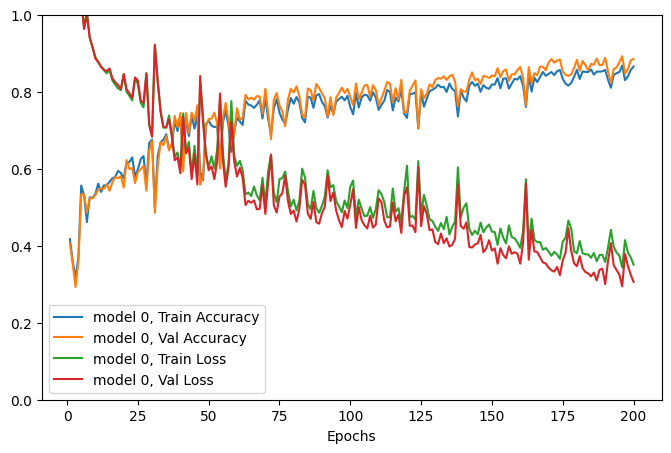

In [2]:
# Look at CNN-LSTM 
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import cnn_lstm 
from peratouch.config import datapath_three_users

D = Data(datapath_three_users, triggers=True, releases=False)
D.split()
D.normalize()
D.reshape_for_lstm(input_size=8, sliding=True)
D.tensors_to_device()
D.print_shapes()

model = cnn_lstm(input_size=8, hidden_conv=8, hidden_lstm=8, out_size=3) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=200)
T.train_model(model)
plot_train([T])
test_accuracy([D], [model])

(1019, 1, 1024)
(1019,)
(188, 1, 1024)
(188,)
(191, 1, 1024)
(191,)


<Figure size 640x480 with 0 Axes>

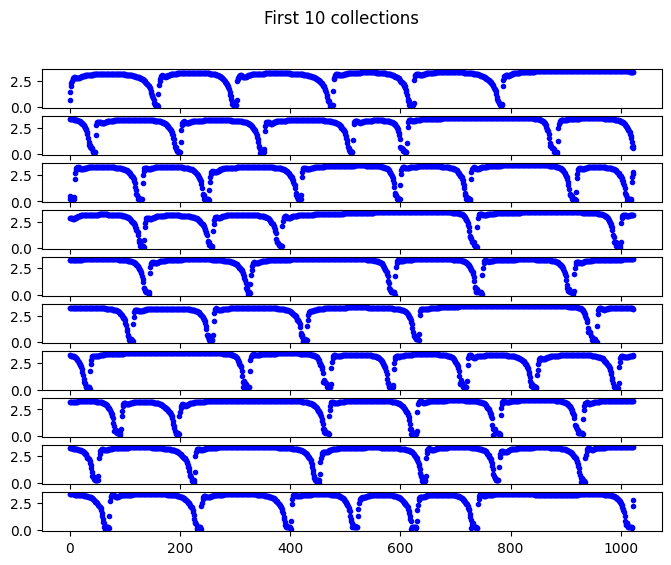

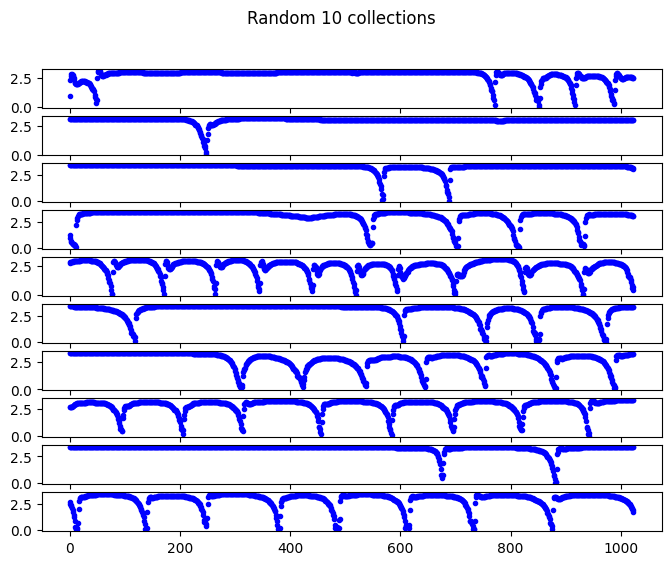

In [2]:
# Look at longer intervals 
# Prepare data for lstm
# TODO: Clean this AWFUL MESS
import numpy as np
filename = "second_collection.npz"

# TODO: Split into train, val, test and do a sliding window on train as data augmentation
def prepare_lstm_long_data(dataPath, stride=1024, length=1024):
    data = np.load(dataPath)

    Xtr, ytr = [], []
    Xte, yte = [], []
    Xval, yval = [], []

    for i, key in enumerate(data):
        udata = data[key]
        
        uXtr = sliding_window(udata[ : int(0.7*len(udata))], stride, length)
        uXte = sliding_window(udata[int(0.7*len(udata)) : int(0.85*len(udata))], stride, length)
        uXval = sliding_window(udata[int(0.85*len(udata)) : ], stride, length)

        Xtr.append(uXtr)
        ytr.append(np.full(len(uXtr), i))
        Xte.append(uXte)
        yte.append(np.full(len(uXte), i))
        Xval.append(uXval)
        yval.append(np.full(len(uXval), i))

    Xtr = np.concatenate(Xtr)[:, np.newaxis, :]
    ytr = np.concatenate(ytr)
    Xte = np.concatenate(Xte)[:, np.newaxis, :]
    yte = np.concatenate(yte)
    Xval = np.concatenate(Xval)[:, np.newaxis, :]
    yval = np.concatenate(yval)
    return Xtr, ytr, Xte, yte, Xval, yval 

def sliding_window(sig, stride, length, filterZerosOut=True):
    if filterZerosOut:
        sig = sig[sig>=0.01]

    idxs = np.arange(0, len(sig), step=stride)   # Discard the last index so lengths match
    X = []
    for i in idxs:
        cut = sig[i : i+length]
        if len(cut)==length:
            if np.any(cut>=2):
                # if np.sum(np.diff(np.argwhere(sig<=0.05)[:, 0])>1) >= 2:
                X.append(cut)

    return np.vstack(X)

# Xtr, ytr, Xte, yte, Xval, yval = prepare_lstm_long_data(filename) 
datasets = prepare_lstm_long_data(filename)
for d in datasets:
    print(d.shape)

import matplotlib.pyplot as plt
data = datasets[0]
n_samp = 10
plt.figure()
r_idxs = np.random.randint(0, len(data), size=n_samp)
f_idxs = np.arange(0, n_samp)
for title, idxs in zip([f"First {n_samp} collections", f"Random {n_samp} collections"], [f_idxs, r_idxs]):
    plt.figure(figsize=(8, 6))
    for i, idx in enumerate(idxs):
        s = data[idx][0]
        plt.subplot(n_samp, 1, i+1)
        plt.plot(np.arange(s.size), s, "b.")
    plt.suptitle(title)
plt.show()

In [6]:
# TODO: Need to try an LSTM layer with a batch_size=1 and each LSTM cell is a sliding window
# Then can also introduce shitfitng of training data set as data aug.
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import lstm_many_to_many 
from peratouch.config import datapath_three_users
stride, length = 100, 100
D = Data(datapath_three_users, triggers=True, releases=False)
# Nasty stuff
D.Xtrain, D.ytrain, D.Xtest, D.ytest, D.Xval, D.yval = prepare_lstm_long_data(filename, stride, length)
D.normalize()
D.tensors_to_device()
D.print_shapes()
model = lstm_many_to_many(input_size=length) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=200, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

Train, test and validation data normalized to:
[1.]
[1.00253426]
[1.00245453]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (7497, 1, 32) 
Labels shape:  (7497,) 
Unique labels:  [0 1 2] 
Shape of test set: (1930, 1, 100) 
Shape of train set: (10342, 1, 100) 
Shape of validation set: (1966, 1, 100) 
Fraction of single class in test set:  0.33419689119170987 
dtype of inputs:  torch.float32
End of epoch 1:loss_tr=1.098, loss_val=1.099, train=31.5%, val=28.7%
End of epoch 2:loss_tr=1.097, loss_val=1.101, train=31.5%, val=28.7%


KeyboardInterrupt: 

In [1]:
# Look at 3 triggers
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import lstm
from peratouch.config import datapath_three_users

D = Data(datapath_three_users, triggers=True, releases=False)
D.split()
D.normalize()
D.resample_random_combinations()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[1.0011533]
[1.00011294]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (7497, 1, 32) 
Labels shape:  (7497,) 
Unique labels:  [0 1 2] 
Shape of test set: (5625, 3, 32) 
Shape of train set: (27080, 3, 32) 
Shape of validation set: (4780, 3, 32) 
Fraction of single class in test set:  0.31377777777777777 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=0.959, loss_val=0.955, train=59.4%, val=60.8%
End of epoch 2:loss_tr=0.859, loss_val=0.857, train=61.2%, val=62.4%
End of epoch 3:loss_tr=0.830, loss_val=0.829, train=60.9%, val=61.8%
End of epoch 4:loss_tr=0.805, loss_val=0.796, train=61.7%, val=62.8%
End of epoch 5:loss_tr=0.790, loss_val=0.778, train=61.7%, val=62.9%
End of epoch 6:loss_tr=0.768, loss_val=0.751, train=64.5%, val=66.8%
End of epoch 7:loss_tr=0.832, loss_val=0.808, train=60.7%, val=63.6%
End of epoch 8:loss_tr=0.708, loss_val=0.680, train=65.7%, val=67.6%
End of epoch 9:loss_tr=0.692, loss_val=0.640, train=69.3%, val=71.3%
End of epoch 10:loss_tr=0.682, loss_val=0.637, train=72.7%, val=77.9%
End of epoch 11:loss_tr=0.648, loss_val=0.589, train=74.2%, val=78.4%
End of epoch 12:loss_tr=0.632, loss_val=0.568, train=73.9%, val=76.5%
End of epoch 13:loss_tr=0.662, loss_val=0.622, train=79.4%, val=84.1%
End of epoch 14:loss_tr=0.656, loss_val=0.624, train=83.6%, val=86.9%
End of epoch 15:loss_tr=0.600

End of epoch 118:loss_tr=0.226, loss_val=0.199, train=90.6%, val=91.4%
End of epoch 119:loss_tr=0.169, loss_val=0.148, train=94.2%, val=95.5%
End of epoch 120:loss_tr=0.162, loss_val=0.141, train=94.2%, val=95.5%
End of epoch 121:loss_tr=0.170, loss_val=0.148, train=93.7%, val=94.5%
End of epoch 122:loss_tr=0.215, loss_val=0.189, train=91.1%, val=91.9%
End of epoch 123:loss_tr=0.159, loss_val=0.138, train=94.5%, val=95.8%
End of epoch 124:loss_tr=0.177, loss_val=0.154, train=93.0%, val=94.0%
End of epoch 125:loss_tr=0.246, loss_val=0.218, train=89.8%, val=91.8%
End of epoch 126:loss_tr=0.166, loss_val=0.145, train=94.1%, val=95.6%
End of epoch 127:loss_tr=0.169, loss_val=0.149, train=94.0%, val=95.7%
End of epoch 128:loss_tr=0.196, loss_val=0.170, train=92.9%, val=94.5%
End of epoch 129:loss_tr=0.236, loss_val=0.208, train=90.5%, val=91.1%
End of epoch 130:loss_tr=0.164, loss_val=0.141, train=94.5%, val=96.0%
End of epoch 131:loss_tr=0.240, loss_val=0.212, train=90.3%, val=92.2%
End of

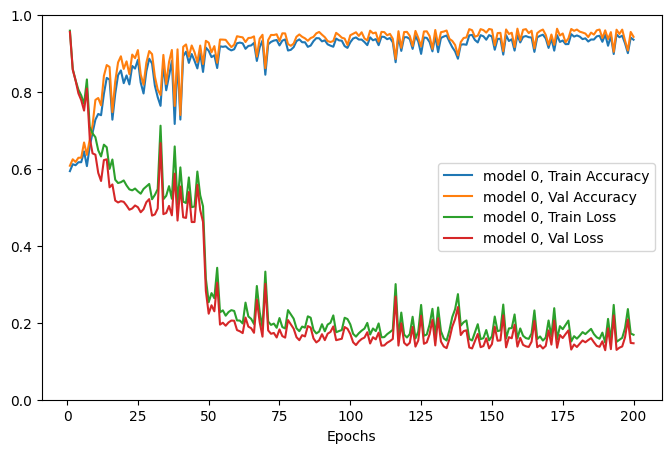

In [10]:
model = lstm(input_size=32, hidden_size=5, out_size=3) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=200, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

In [1]:
# Look at simpler cnn_lstm 
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import cnn_lstm_simpler 
from peratouch.config import datapath_three_users

D = Data(datapath_three_users, triggers=True, releases=False)
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[1.0011533]
[1.00011294]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (7497, 1, 32) 
Labels shape:  (7497,) 
Unique labels:  [0 1 2] 
Shape of test set: (1125, 1, 32) 
Shape of train set: (5416, 1, 32) 
Shape of validation set: (956, 1, 32) 
Fraction of single class in test set:  0.31377777777777777 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=0.882, loss_val=0.885, train=56.3%, val=55.5%
End of epoch 2:loss_tr=0.850, loss_val=0.853, train=61.8%, val=61.3%
End of epoch 3:loss_tr=0.812, loss_val=0.799, train=63.5%, val=65.0%
End of epoch 4:loss_tr=0.748, loss_val=0.750, train=66.6%, val=67.9%
End of epoch 5:loss_tr=0.682, loss_val=0.682, train=70.2%, val=71.0%
End of epoch 6:loss_tr=0.612, loss_val=0.604, train=72.1%, val=72.5%
End of epoch 7:loss_tr=0.577, loss_val=0.581, train=74.1%, val=72.9%
End of epoch 8:loss_tr=0.531, loss_val=0.532, train=76.6%, val=77.5%
End of epoch 9:loss_tr=0.500, loss_val=0.493, train=77.7%, val=79.0%
End of epoch 10:loss_tr=0.489, loss_val=0.474, train=78.3%, val=80.4%
End of epoch 11:loss_tr=0.469, loss_val=0.443, train=79.5%, val=82.8%
End of epoch 12:loss_tr=0.477, loss_val=0.473, train=79.4%, val=79.7%
End of epoch 13:loss_tr=0.444, loss_val=0.417, train=81.1%, val=83.3%
End of epoch 14:loss_tr=0.434, loss_val=0.413, train=82.2%, val=83.2%
End of epoch 15:loss_tr=0.418

End of epoch 118:loss_tr=0.278, loss_val=0.269, train=88.8%, val=89.7%
End of epoch 119:loss_tr=0.267, loss_val=0.268, train=89.6%, val=90.0%
End of epoch 120:loss_tr=0.280, loss_val=0.288, train=88.5%, val=88.9%
End of epoch 121:loss_tr=0.274, loss_val=0.278, train=89.0%, val=89.9%
End of epoch 122:loss_tr=0.271, loss_val=0.280, train=89.2%, val=89.5%
End of epoch 123:loss_tr=0.277, loss_val=0.287, train=88.9%, val=89.0%
End of epoch 124:loss_tr=0.298, loss_val=0.313, train=87.9%, val=86.9%
End of epoch 125:loss_tr=0.269, loss_val=0.267, train=89.3%, val=89.9%
End of epoch 126:loss_tr=0.259, loss_val=0.264, train=89.8%, val=89.6%
End of epoch 127:loss_tr=0.267, loss_val=0.275, train=89.6%, val=89.1%
End of epoch 128:loss_tr=0.282, loss_val=0.291, train=88.6%, val=87.9%
End of epoch 129:loss_tr=0.260, loss_val=0.265, train=89.9%, val=89.4%
End of epoch 130:loss_tr=0.256, loss_val=0.257, train=90.1%, val=90.5%
End of epoch 131:loss_tr=0.277, loss_val=0.287, train=88.6%, val=88.3%
End of

End of epoch 235:loss_tr=0.231, loss_val=0.246, train=91.1%, val=90.1%
End of epoch 236:loss_tr=0.234, loss_val=0.257, train=91.0%, val=89.5%
End of epoch 237:loss_tr=0.242, loss_val=0.252, train=90.7%, val=89.6%
End of epoch 238:loss_tr=0.241, loss_val=0.262, train=90.6%, val=89.1%
End of epoch 239:loss_tr=0.230, loss_val=0.258, train=91.0%, val=89.1%
End of epoch 240:loss_tr=0.234, loss_val=0.258, train=90.7%, val=89.6%
End of epoch 241:loss_tr=0.224, loss_val=0.244, train=91.5%, val=90.7%
End of epoch 242:loss_tr=0.225, loss_val=0.250, train=91.5%, val=90.3%
End of epoch 243:loss_tr=0.264, loss_val=0.272, train=89.1%, val=88.9%
End of epoch 244:loss_tr=0.226, loss_val=0.252, train=91.5%, val=90.0%
End of epoch 245:loss_tr=0.232, loss_val=0.259, train=91.2%, val=89.5%
End of epoch 246:loss_tr=0.228, loss_val=0.252, train=91.1%, val=90.0%
End of epoch 247:loss_tr=0.223, loss_val=0.252, train=91.2%, val=90.0%
End of epoch 248:loss_tr=0.236, loss_val=0.257, train=90.5%, val=89.4%
End of

End of epoch 352:loss_tr=0.226, loss_val=0.270, train=91.2%, val=89.2%
End of epoch 353:loss_tr=0.216, loss_val=0.248, train=91.7%, val=90.6%
End of epoch 354:loss_tr=0.210, loss_val=0.246, train=92.1%, val=90.2%
End of epoch 355:loss_tr=0.210, loss_val=0.237, train=92.3%, val=90.9%
End of epoch 356:loss_tr=0.211, loss_val=0.256, train=92.0%, val=90.2%
End of epoch 357:loss_tr=0.219, loss_val=0.263, train=91.4%, val=89.0%
End of epoch 358:loss_tr=0.225, loss_val=0.260, train=91.1%, val=89.2%
End of epoch 359:loss_tr=0.217, loss_val=0.252, train=91.7%, val=88.9%
End of epoch 360:loss_tr=0.239, loss_val=0.279, train=90.4%, val=88.4%
End of epoch 361:loss_tr=0.220, loss_val=0.243, train=91.7%, val=90.0%
End of epoch 362:loss_tr=0.224, loss_val=0.258, train=91.6%, val=90.7%
End of epoch 363:loss_tr=0.230, loss_val=0.272, train=90.8%, val=88.6%
End of epoch 364:loss_tr=0.221, loss_val=0.266, train=91.6%, val=88.3%
End of epoch 365:loss_tr=0.221, loss_val=0.267, train=91.4%, val=89.9%
End of

End of epoch 469:loss_tr=0.204, loss_val=0.265, train=92.0%, val=88.8%
End of epoch 470:loss_tr=0.214, loss_val=0.251, train=91.8%, val=90.6%
End of epoch 471:loss_tr=0.215, loss_val=0.269, train=91.7%, val=88.8%
End of epoch 472:loss_tr=0.227, loss_val=0.299, train=91.2%, val=88.9%
End of epoch 473:loss_tr=0.215, loss_val=0.257, train=91.6%, val=89.5%
End of epoch 474:loss_tr=0.201, loss_val=0.247, train=92.4%, val=90.1%
End of epoch 475:loss_tr=0.207, loss_val=0.245, train=92.6%, val=90.7%
End of epoch 476:loss_tr=0.205, loss_val=0.265, train=92.2%, val=89.3%
End of epoch 477:loss_tr=0.204, loss_val=0.264, train=92.2%, val=89.6%
End of epoch 478:loss_tr=0.213, loss_val=0.256, train=91.7%, val=89.6%
End of epoch 479:loss_tr=0.206, loss_val=0.252, train=92.1%, val=90.2%
End of epoch 480:loss_tr=0.202, loss_val=0.260, train=92.6%, val=90.9%
End of epoch 481:loss_tr=0.197, loss_val=0.245, train=92.7%, val=90.4%
End of epoch 482:loss_tr=0.196, loss_val=0.250, train=93.0%, val=90.0%
End of

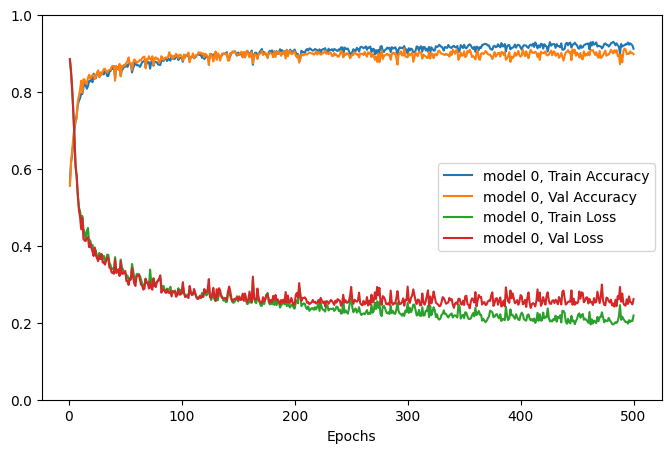

In [7]:
model = cnn_lstm_simpler(n_ch=2, hidden_lstm=8, out_size=3) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=200, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

In [ ]:
# This function can be used to look at a sliding window 
# Not better performing than just using a split (i.e. no stride==input_size)
def change_input(x, I, S):
    """I is window size, S is stride"""

    # Make a mask used to transform inputs 
    bs = x.shape[0]
    W = x.shape[-1] 
    L = int((W - I) / S + 1)

    mask = np.full((L, W), False)
    mask[0, :I] = True 
    for i in range(1, L):
        mask[i] = np.roll(mask[i-1], shift=S)

    result = np.zeros((bs, L, I))
    x = x * np.ones((1, L, 1))  # multiply by ones to extend shape
    for i in range(bs):
        result[i] = x[i][mask].reshape((L, I))
    return result

In [20]:
# Exploring some reshaping
import numpy as np
x = np.arange(50).reshape((5, 1, 10))
print(x)
res = []
input_size = 5
for i in range(x.shape[-1] - input_size + 1):
    res.append(x[:, :, i:i+input_size])
x = np.concatenate(res, axis=1)
print("Reshaped:\n", x)
print(x.shape)

[[[ 0  1  2  3  4  5  6  7  8  9]]

 [[10 11 12 13 14 15 16 17 18 19]]

 [[20 21 22 23 24 25 26 27 28 29]]

 [[30 31 32 33 34 35 36 37 38 39]]

 [[40 41 42 43 44 45 46 47 48 49]]]
Reshaped:
 [[[ 0  1  2  3  4]
  [ 1  2  3  4  5]
  [ 2  3  4  5  6]
  [ 3  4  5  6  7]
  [ 4  5  6  7  8]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [11 12 13 14 15]
  [12 13 14 15 16]
  [13 14 15 16 17]
  [14 15 16 17 18]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [21 22 23 24 25]
  [22 23 24 25 26]
  [23 24 25 26 27]
  [24 25 26 27 28]
  [25 26 27 28 29]]

 [[30 31 32 33 34]
  [31 32 33 34 35]
  [32 33 34 35 36]
  [33 34 35 36 37]
  [34 35 36 37 38]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [41 42 43 44 45]
  [42 43 44 45 46]
  [43 44 45 46 47]
  [44 45 46 47 48]
  [45 46 47 48 49]]]
(5, 6, 5)
